# Lab 5: Feedforward Neural Network by Salvin Chowdhury
Neural networks consist of layers of neurons applying linear models followed by activation functions such as ReLU in hidden layers and sigmoid in output layers. In Lab 5, we use a multi-layer perceptron to explore how neural networks classify data, focusing on decision boundaries without performing a train/test split.

### Problem 1
- **Question 1:** What do the parameters to the MLPClassifier class mean?
- **Question 2:** Draw a graph of the network configuration/achetecture.
- **Question 3:** What activation functions are used for each node?

- **Asnwer 1:** for the parameters in the MLPClassifier class, the parameter `hidden_layer_sizes=(4,)` means we're setting 1 hidden layer with 4  neurons, `max_iter=1000` is the maximum number of iterations for the optimizer to converge and  `solver='lbfgs'` is the optimization algorithm, where lbfgs is a quasi-Newton method

- **Answer 2:** input layer (X1 & X2) -> Hidden layer (1 neurons: h1, h2, h3, h4) -> Output layer (1 neuron: y)
  
- **Answer 3:** for the hidden layer, we use ReLU activation function and for the output layer, we use the sigmoid activation function

### Problem 2
- **Question 1:** What are the dimensions of mlp.coefs_[0] and mlp.intercepts_[0]? Where do those dimensions come from?
- **Question 2:** Comment on the abilities of the lines to separate Class 1 from Class 0.

- **Answer 1:** for `mlp.coefs_[0] ` we get (2, 4), which means 2 rows (X1, X2) and 4 columns for each hidden neuron. This is where each entry is a weight connecting a specific input feature to a specific hidden neuron. For `mlp.intercepts_[0].shape`, we get (4,), which means each hidden neuron has a bias term, so 4 biases total.

- **Answer 2:** looking at the neuron decision boundaries, we see that Neuron 2 and 3 have decision boundaries that separate the two classes, but Neuron 1 and 4 fail to do that. This shows that some neurons are able to capture the pattern of the XOR dataset but other neurons aren't able to.

### Problem 3
- **Question 1:** How does a ReLU function differ from a logistic function? What would the heatmaps/contour plots look like if we used logistic function as an activation layer instead?
- **Question 2:** A neural network consists of different layers and a final classification layer. Which activation function (ReLU or logistic) is more suitable to use for a classification layer? Which activation function is more suitable to use for an inner layer? – You may need to look up this information.

- **Answer 1:** a ReLU activation function has a output range between 0 to negative and is linear for positive inputs but zero otherwise. For a logisitic function, the output range is between 0 to 1 and produces a smooth, S shaped curve. When it comes to effect on heatmaps / contour plots, when we use ReLU hiiden neurons, the heatmaps will look like sharp & linear but with logistic hidden neurons the heatmaps will appear smooth and curved. 
  
- **Answer 2:** For inner layers, the activation function to use is ReLU as it introduced non-linearity, which allows the model to learn complex patterns. Since it avoids the vanishing gradient problem for positive inputs, it makes training faster. For the classification layer, the activation function to use is sigmoid as the output layer needs to produce values between 0 and 1 for interpreting class likelihood.

### Problem 4
- **Question 1:** How do the ROC's two models compare? Did the transformed features produce a more accurate model?
- **Question 2:** Are MLP's example of linear or non-linear models?

- **Answer 1:** When comparing both ROC's, we look at the AUC values. For the first ROC, it is close to being diagonal with a value of 0.473, which is a little worse than the baseline at 0.5. This problem happens because XOR is non-linearly separable, and with a logistic regression model, it can't capture the pattern. For the second ROC, it has a AUC value of 1. The transformed features from the hidden layer neurons capture the non-linear pattern in the XOR dataset. As a result, using a logistic regression model on the features allows the model to separate the classes.
  
- **Answer 2:** MLPs are example of non-linear models because it can capture complex relationships in a dataset that can't be captured using using straight lines and etc. Furthermore, a MLP works using neurons which applies a linear transformation to the inputs and then applies a non-linear activation function that allows the MLP to approximate non-linear functions. As a result, MLPs are non-linear models because they apply non-linear activations after linear transformations, which allows them to capture complex relationships that linear models cannot.

## Experiment 1: Data Loading, Data Visualization & Baseline Models
In this experiment, we load and visualize the XOR dataset, train a logistic regression model using `SGDClassifier` and evaluate its performance by plotting the ROC curve with a baseline line and displaying the AUC curves.

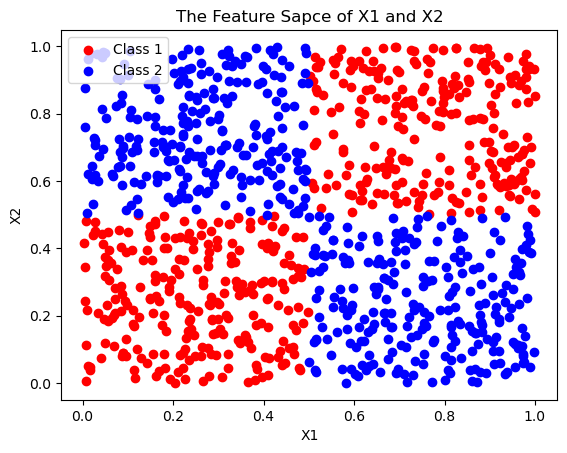

In [ ]:

"""

    1. load the provided xor dataset using numpy
    2. plot the dataset in the feature space and make sure to label the axis and observations by class

"""

# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import dataset and plot
xor_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/6_week-six/lab/code/xor.csv")

# labeling
class_x1 = xor_df[xor_df.label == 0]
class_x2 = xor_df[xor_df.label == 1]

plt.scatter(class_x1.X1, class_x1.X2, color='red', label='Class 1')
plt.scatter(class_x2.X1, class_x2.X2, color='blue', label='Class 2')

plt.title("The Feature Sapce of X1 and X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()



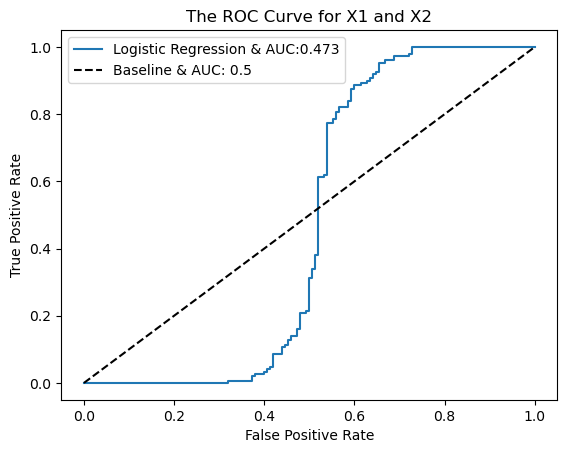

In [23]:

"""

    3. train a logistic regression model SGDClassifier on the dataset
    4. calculate the true positive rate and false positive rate on the predictions
        a. plot the results in a ROC curve

"""

# importing required libraries
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


# X and y
X = xor_df[["X1", "X2"]]
y = xor_df["label"]

# perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# perform logistic regression
model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)

# fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]

# find the tpr and fpr
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# find the AUC
auc_roc = roc_auc_score(y_test, y_pred)

# plot the tpr vs fpr
plt.plot(fpr, tpr, label=f"Logistic Regression & AUC:{auc_roc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', label='Baseline & AUC: 0.5')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('The ROC Curve for X1 and X2')
plt.legend()
plt.show()



## Experiment 2: Training & Visualizing Layers of Multi-Layer Perceptron (MLP)
In this experiment, we tain a 4-neuron MLP on the XOR dataset and extract the hidden layer weights to compute each neuron's decision boundary by solving x2 = -(Bo + B1x1) / B2. We then visualize the scaled features along with these boundaries and using the provided Input and Neuron classes, we evaluate the neuron outputs on a mesh grid.


In [52]:

"""

    1. train a MLP on the "xor" dataset using 4 neurons
    2. extract the weight vector for the hidden layers


"""

# importing libraries
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# scaling the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# creating a mlp
mlp = MLPClassifier(hidden_layer_sizes=(4,),max_iter=1000, solver="lbfgs")
mlp.fit(scaled_X, y)

# extracting the weight vector for the hidden layers
mlp_models = np.vstack([mlp.intercepts_[0], mlp.coefs_[0]]).T
print("MLP Models Shape: ", mlp_models.shape)
print(mlp_models)
print()

print(mlp.coefs_[0].shape)
print(mlp.intercepts_[0].shape)

MLP Models Shape:  (4, 3)
[[-10.52366248  49.42287297   6.65263127]
 [ -2.02615451  15.75504408   1.74293578]
 [ -1.06106745  -0.19845085   0.060228  ]
 [ -8.52369392  42.80776881  -8.22562577]]

(2, 4)
(4,)


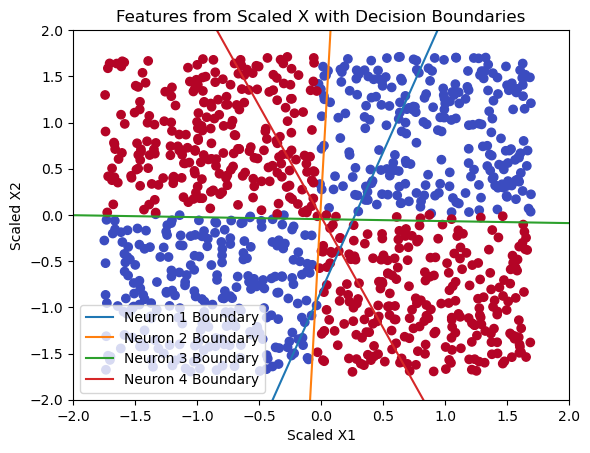

In [ ]:

"""

    3. re-arrnage the following equation to solve for x2
        a. 0 = Bo + B1x1 + B2x2 --> - Bo - B1x1 / B2 = x2

    4. make one figure that visualizes the features from Scaled X along with the decision boundaries for 
        the 4 neurons in the hidden layer. Use appropriate axis limits for this visualization

"""

# plotting
plt.scatter(scaled_X[:,0], scaled_X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Scaled X1")
plt.ylabel("Scaled X2")
plt.title("Features from Scaled X with Decision Boundaries")

# decision boundaries
x1_values = np.linspace(-2, 2, 200)
for i in range(mlp_models.shape[0]):
    b0, b1, b2 = mlp_models[i]
    x2_values = -(b0 + b1 * x1_values) / b2
    plt.plot(x1_values, x2_values, label=f"Neuron {i+1} Boundary")


plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()


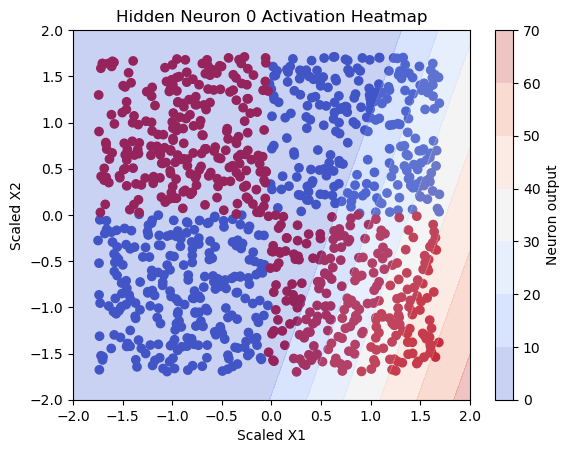

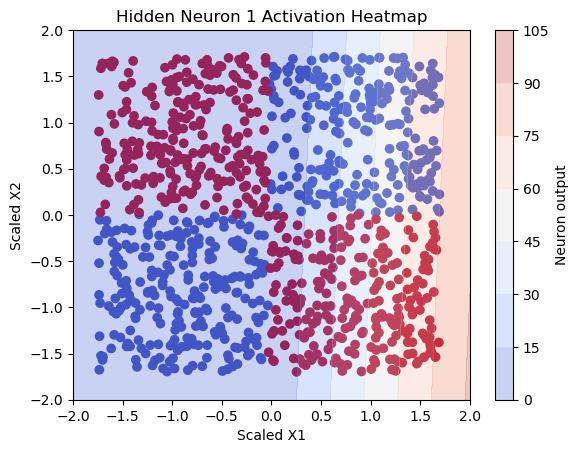

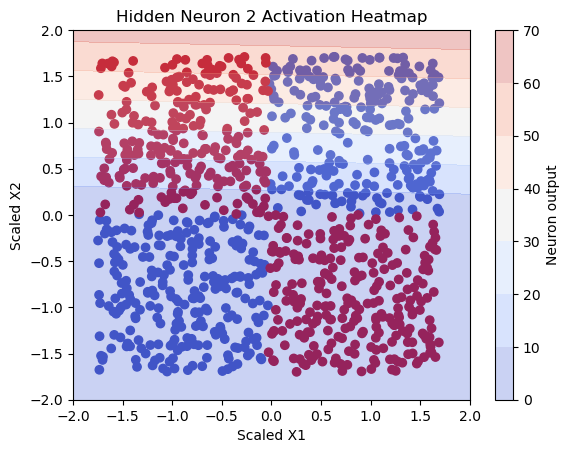

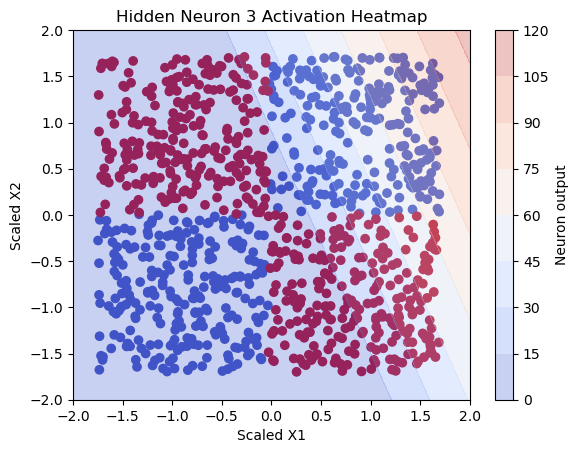

In [41]:

"""

    5. create a mesh grid in the range of [-2, 2] along each dimension
    6. plot the grid of synthetic plots as a scatter plot
    7. use the input and neuron classes in the provided neurons.py file to calculate the value for the first hidden layer neuron at each point
    8. repeat for the remaining 3 neurons in the hidden layer

"""

# importing libraries
import sys
sys.path.append(r"C:\GitHub\Semester 5\TheoryOfMachineLearning\6_week-six\lab\code")
from neurons import Input, Neuron, HStack

# create mesh grid
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# neuron prediction
input_layer = Input()

# looping through all neurons
for i in range(4):

    p_layer = Neuron([input_layer], mlp_models[i, :])
    pred = p_layer.predict(grid_points)
    pred_grid = pred.reshape(xx.shape)

    # plotting
    plt.scatter(scaled_X[:,0], scaled_X[:,1], c=y, cmap='coolwarm')
    plt.contourf(xx, yy, pred_grid, cmap='coolwarm', alpha=0.3) 
    plt.colorbar(label='Neuron output')
    plt.xlabel("Scaled X1")
    plt.ylabel("Scaled X2")
    plt.title(f"Hidden Neuron {i} Activation Heatmap")
    plt.show()


## Experiment 3: Train a Logistic Regression Model on New Features
In this experiment, we take the outputs of the 4 hidden neurons in our trained MLP and combining them using the HStack class to create a transformed feature matrix, which wwe then use as input to train a Logisitic Regression model. After training, we evaluate this new model using FPR and TPR and plotting a ROC curve that compares it to the baseline results.

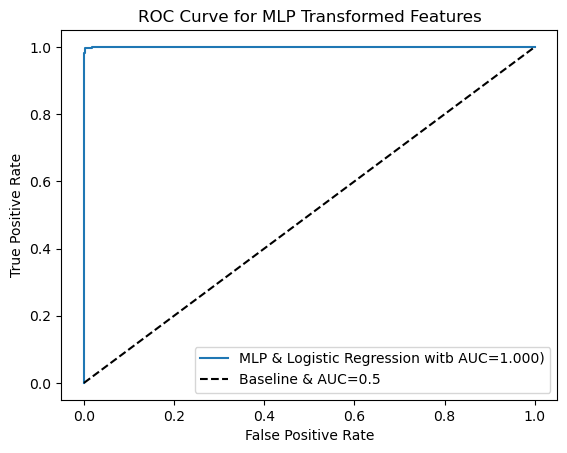

In [51]:

"""

    1. use the input, neuron and HStack classes with the weights from the MLP model to recreate the hidden layer
    2. predict the transformed values to create a transformed feature matrix
    3. train a logistic regression model using new features that were created by the MLP

    4. calculate the tpr and fpr on the predictions and plot the results in a ROC
        a. ROC should include the results from experiment 1 in addition to newly trained model

"""

# importing required libraries
from sklearn.linear_model import LogisticRegression


# using input, neuron and HStack classes with weights from MLP model
input = Input()
p_layer_1 = Neuron([input], mlp_models[0, :])
p_layer_2 = Neuron([input], mlp_models[1, :])
p_layer_3 = Neuron([input], mlp_models[2, :])
p_layer_4 = Neuron([input], mlp_models[3, :])
stacked = HStack([p_layer_1, p_layer_2, p_layer_3, p_layer_4])

# predict transformed values to create trasnformed feature
transformed_X = stacked.predict(scaled_X)

# performing logistic regression
regression = LogisticRegression()
regression.fit(transformed_X, y)
y_pred_prob = regression.predict_proba(transformed_X)[:, 1]

# calculating tpr and fpr
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)
plt.plot(fpr, tpr, label=f'MLP & Logistic Regression witb AUC={auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline & AUC=0.5')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for MLP Transformed Features")
plt.legend()
plt.show()

